In [101]:
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
#import pandas as pd

In [3]:
data_path = '../data/DoubleMuonLowMass_Run2018A.root'

data = uproot.open(f'{data_path}:Events;1')

In [4]:
data_length = len(data['event'].array())


target_hlt_keys = [
    'HLT_Tau3Mu_Mu5_Mu1_TkMu1_IsoTau10_Charge1',
    'HLT_Tau3Mu_Mu7_Mu1_TkMu1_IsoTau15_Charge1',
    'HLT_Tau3Mu_Mu7_Mu1_TkMu1_Tau15_Charge1',
]

data_hlt_keys = data.keys(filter_name='HLT_Tau3Mu*')

hlt_keys = [hlt_key for hlt_key in target_hlt_keys if hlt_key in data_hlt_keys]

print(f"hlt_keys: {hlt_keys}")

hlt_mask = ak.Array(np.zeros(data_length, dtype=bool))

for hlt_key in hlt_keys:
    hlt_mask = hlt_mask | data[hlt_key].array()


print(f"Before filtering, Event #: {data_length}")
print(f"After filtering, Event #: {np.count_nonzero(hlt_mask)}")

hlt_keys: ['HLT_Tau3Mu_Mu7_Mu1_TkMu1_IsoTau15_Charge1', 'HLT_Tau3Mu_Mu7_Mu1_TkMu1_Tau15_Charge1']
Before filtering, Event #: 2040266
After filtering, Event #: 322902


In [148]:
muon_eta = data['Muon_eta'].array()[hlt_mask]
muon_pt = data['Muon_pt'].array()[hlt_mask]
muon_medium_id = data['Muon_mediumId'].array()[hlt_mask]

print(len(muon_pt))

muon_mask = ( (muon_pt > 3.5) & (abs(muon_eta) <= 1.2) & (muon_medium_id) ) \
          | ( (muon_pt > 2.0) & (abs(muon_eta <= 2.4)) & (abs(muon_eta >= 1.2)) & (muon_medium_id) )


muon_pt = muon_pt[muon_mask]

muon_pt = muon_pt[ak.count(muon_pt, axis=1) >= 3]

#muon_pt = ak.sort(muon_pt, ascending=False)


print(len(muon_pt))

322902
13802


In [149]:
leading_muon_pt = ak.drop_none(muon_pt[:, 0])
subleading_muon_pt = ak.drop_none(muon_pt[:, 1])
trailing_muon_pt = ak.drop_none(ak.flatten(muon_pt[:, 2:]))

print(leading_muon_pt)
print(len(leading_muon_pt))
print(subleading_muon_pt)
print(len(subleading_muon_pt))
print(trailing_muon_pt)
print(len(trailing_muon_pt))

[9.19, 14.4, 9.54, 7.66, 12.1, 11.2, ..., 20, 7.67, 13.9, 7.47, 8.42, 17.7]
13802
[9, 7.24, 4.14, 7.07, 4.61, 8.23, 6.41, ..., 6.44, 3.96, 9.45, 3.8, 5, 5.42]
13802
[4.37, 4.63, 3.23, 4, 4.58, 3.65, 3.64, ..., 3.59, 3.26, 6.43, 3.76, 3.99, 4.94]
14496


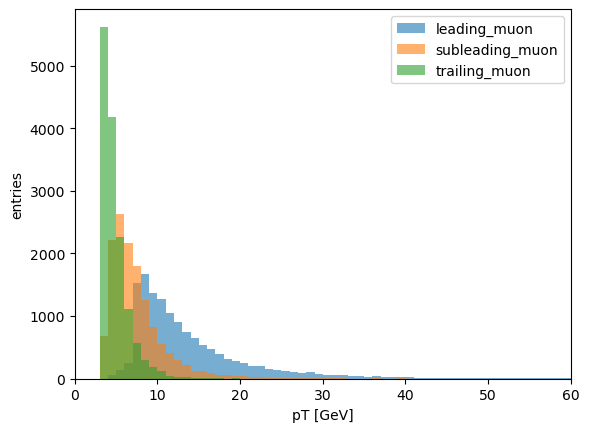

In [152]:
plt.hist(leading_muon_pt,    bins=60, alpha=0.6, range=(0, 60), label="leading_muon")
plt.hist(subleading_muon_pt, bins=60, alpha=0.6, range=(0, 60), label="subleading_muon")
plt.hist(trailing_muon_pt,   bins=60, alpha=0.6, range=(0, 60), label="trailing_muon")
plt.xlim(0, 60)
plt.xlabel("pT [GeV]")
plt.ylabel("entries")
plt.legend()
plt.show()
